# Hypothesis testing
A statistical hypothesis test is a method of statistical inference used to decide whether the data sufficiently support a particular hypothesis.
Statistical hypothesis tests are based on statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing, and a alternate hypothesis thatt states that there is a statistical significance 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from random import sample 

# T test
### Single sample T test
Use a one sample t test to evaluate a population mean using a single sample. Usually, you conduct this hypothesis test to determine whether a population mean differs from a hypothesized value you specify.
EX: A phone company claims that the new battery technology would last 24 hours if fully charged.
A single t test would be able to test this claim. 

In the below code, we create a population that has a noraml distribution with a mean of 24 and std of 1, note that this is the ground truth and in a realistic situation, the mean and std of the population are unkown.
The code then random samples from the population to retrieve a sample set that we will apply single sample T test on.
- H0 (null hypothesis): The population mean equals the hypothesized value(24 hours battery life) 
- H1 (Alternative hypothesis): The population mean does not equal the hypothesized value.

The threshold to test for statistcal sitgnificants would be set to 0.05 or 5%, this is a common threshold. 

The sample mean is 24.00 hours, and the sample std is 1.00


Text(0.5, 1.0, 'Sample')

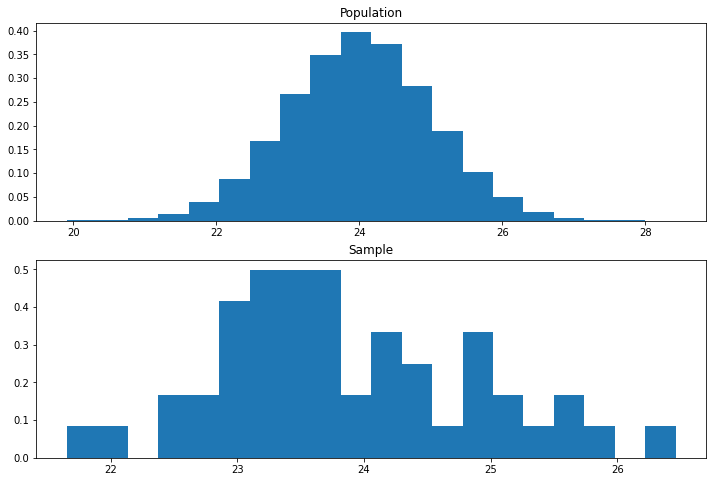

In [9]:
population= stats.norm.rvs(loc=24, scale=1, size=150000)
sample = np.random.choice(population,size = 50)

# print(f'The population mean is {population.mean():.2f}, and the population std is {population.std():.2f}')
print(f'The sample mean is {population.mean():.2f} hours, and the sample std is {population.std():.2f}')

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))
ax[0].hist(population, density=True, bins=20)
ax[0].set_title('Population')
ax[1].hist(sample, density=True, bins=20)
ax[1].set_title('Sample')

In [10]:
t_stat, p_value = stats.ttest_1samp(sample, popmean=24)
print(f'The p value for this T test is {p_value:.4f}')

The p value for this T test is 0.3538


Since the p value is larger than 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the claim of the company is correct.
In this example, since we know the population mean is indeed 24 hours, the test is prove to give us the correct inference.

However, if we create a population with a mean of 23 hours and a std of 1. The t test gives us a p value less than the threshold 0.05, in that case, we will reject the null hypothesis and conclude that the battery life is not 24 hours. Note: we can only conlcude that the battery life is not 24 hours, but we can not imply that it is larger or lower than 24 hours.

The p value for this T test is 9.166280643946068e-11


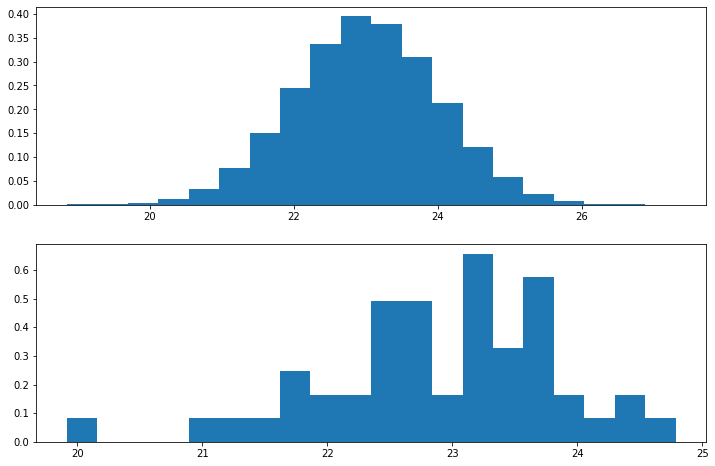

In [12]:
population2 = stats.norm.rvs(loc=23, scale=1, size=150000)
sample2 = np.random.choice(population2,size = 50)
fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))
ax[0].hist(population2, density=True, bins=20)
ax[1].hist(sample2, density=True, bins=20)

t_stat, p_value = stats.ttest_1samp(sample2, popmean=24)
print(f'The p value for this T test is {p_value}')